# Loading the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
movie = pd.read_csv('movies.dat', sep = '::',encoding='ISO-8859-1',engine='python')
rating = pd.read_csv('ratings.dat', sep = '::',encoding='ISO-8859-1',engine='python')
user = pd.read_csv('users.dat', sep = '::',encoding='ISO-8859-1',engine='python')

In [3]:
df_mov = pd.DataFrame(movie)
lis = df_mov.columns
df_mov.loc[len(df_mov)] = lis
df_mov.columns = ['MovieIDs','Movie_Name','Genre']
print(df_mov.head(),'\n\n\nNull values:\n\n',df_mov.isnull().sum(),'\n\n',df_mov.shape)

  MovieIDs                          Movie_Name                         Genre
0        2                      Jumanji (1995)  Adventure|Children's|Fantasy
1        3             Grumpier Old Men (1995)                Comedy|Romance
2        4            Waiting to Exhale (1995)                  Comedy|Drama
3        5  Father of the Bride Part II (1995)                        Comedy
4        6                         Heat (1995)         Action|Crime|Thriller 


Null values:

 MovieIDs      0
Movie_Name    0
Genre         0
dtype: int64 

 (3883, 3)


In [4]:
df_rating = pd.DataFrame(rating)
lis = df_rating.columns
df_rating.loc[len(df_rating)] = lis
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
print(df_rating.head(),'\n\n\nNull values:\n\n',df_rating.isnull().sum(),'\n\n',df_rating.shape)

  ID MovieID Ratings  TimeStamp
0  1     661       3  978302109
1  1     914       3  978301968
2  1    3408       4  978300275
3  1    2355       5  978824291
4  1    1197       3  978302268 


Null values:

 ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64 

 (1000209, 4)


In [5]:
df_user = pd.DataFrame(user)
lis = df_user.columns
df_user.loc[len(df_user)] = lis
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
print(df_user.head(),'\n\n\nNull values:\n\n',df_user.isnull().sum(),'\n\n',df_user.shape)

  UserID Gender Age Occupation Zip-code
0      2      M  56         16    70072
1      3      M  25         15    55117
2      4      M  45          7    02460
3      5      M  25         20    55455
4      6      F  50          9    55117 


Null values:

 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64 

 (6040, 5)


# Merging all the data

In [6]:
conc_dat=pd.concat([df_mov,df_rating,df_user],axis=1)
df=conc_dat.copy()
df.shape

(1000209, 12)

In [7]:
df=df.dropna(axis=0)

In [8]:
df=df.sample(len(df))
df.shape

(3883, 12)

In [9]:
print(df.dtypes,'\n',df.shape)

MovieIDs      object
Movie_Name    object
Genre         object
ID            object
MovieID       object
Ratings       object
TimeStamp     object
UserID        object
Gender        object
Age           object
Occupation    object
Zip-code      object
dtype: object 
 (3883, 12)


In [10]:
df['Occupation']=df['Occupation'].astype(int)
df['Ratings']=df['Ratings'].astype(int)
df['MovieIDs']=df['MovieIDs'].astype(int)
df['ID']=df['ID'].astype(int)
df['MovieID']=df['MovieID'].astype(int)
df['TimeStamp']=df['TimeStamp'].astype(int)
df['Age']=df['Age'].astype(int)
df['UserID']=df['UserID'].astype(int)

In [11]:
df.dtypes

MovieIDs       int32
Movie_Name    object
Genre         object
ID             int32
MovieID        int32
Ratings        int32
TimeStamp      int32
UserID         int32
Gender        object
Age            int32
Occupation     int32
Zip-code      object
dtype: object

In [12]:
df

,MovieIDs,Movie_Name,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
463,468,"Englishman Who Went Up a Hill, But Came Down a...",Comedy|Romance,6,48,5,978237570,465,M,18,19,94523
630,636,Frisk (1995),Drama,8,1210,4,978228789,632,M,45,17,07649
2368,2438,Outside Ozona (1998),Drama|Thriller,19,2321,4,978299636,2370,M,50,1,13215
2442,2512,"Ballad of Narayama, The (Narayama Bushiko) (1982)",Drama,19,3744,4,978147373,2444,F,45,4,42420
1075,1092,Basic Instinct (1992),Mystery|Thriller,10,3097,5,978226951,1077,M,25,3,60660
...,...,...,...,...,...,...,...,...,...,...,...,...
457,462,"Good Man in Africa, A (1994)",Action|Adventure,6,3578,4,978238195,459,F,18,4,55105
1780,1850,"I Love You, Don't Touch Me! (1998)",Drama|Romance,17,2660,4,978160437,1782,M,45,0,23454
429,434,Cliffhanger (1993),Action|Adventure|Crime,5,1529,4,978245037,431,M,18,10,55303
1708,1764,Tainted (1998),Comedy|Thriller,16,2720,1,978174597,1710,M,18,0,94530


The final dataset is ready now in df

In [13]:
df.isna().sum()

MovieIDs      0
Movie_Name    0
Genre         0
ID            0
MovieID       0
Ratings       0
TimeStamp     0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

Additionally this proves that we have done the merging in the right way

In [14]:
dup = df[df.duplicated()]
dup

,MovieIDs,Movie_Name,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code


This shows there are no duplicate rows

# Visualizations

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Age', ylabel='count'>

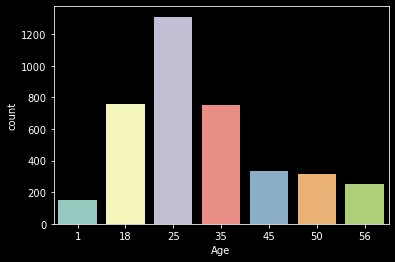

In [16]:
plt.style.use("dark_background")
sns.countplot(data=df, x='Age')

majority users are of age 25 and this graph shows slight positive skewness

<AxesSubplot:xlabel='Ratings', ylabel='count'>

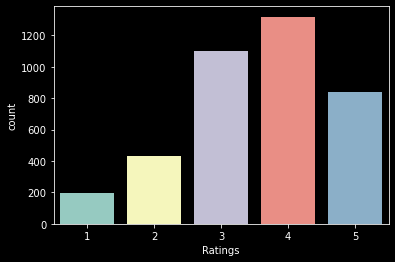

In [17]:
sns.countplot(data=df, x='Ratings')

Most of the users have given overall of 4 ratings, This graph shows negative skewness. This shows that the users are satisfied with the movies

<AxesSubplot:xlabel='Gender', ylabel='count'>

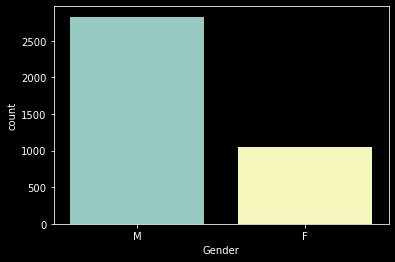

In [18]:
sns.countplot(data=df, x='Gender')

Men have watched more number of movies than women

In [19]:
groupedby_movieName = df.groupby('Movie_Name')
Gladiator_data = groupedby_movieName.get_group('Gladiator (2000)')
Gladiator_data

,MovieIDs,Movie_Name,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
3508,3578,Gladiator (2000),Action|Drama,26,2822,3,978141288,3510,F,18,4,02142


<AxesSubplot:xlabel='Age', ylabel='Movie_Name'>

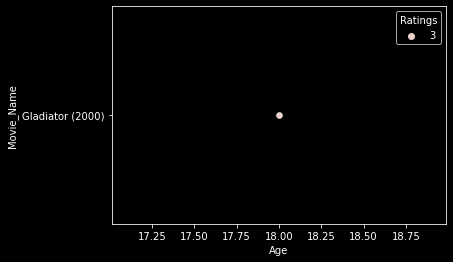

In [20]:
sns.scatterplot(data=Gladiator_data,x='Age',y = 'Movie_Name',hue='Ratings')

Just an insight about how much rating has been given to Gladiator movie by different aged viewers

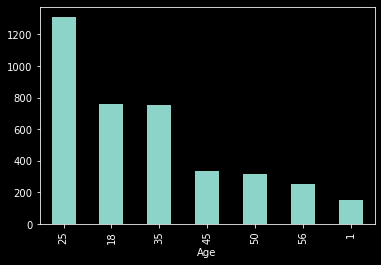

In [21]:
df["Age"].value_counts().plot(kind="bar")
plt.show()

Text(0.5, 0, 'Age')

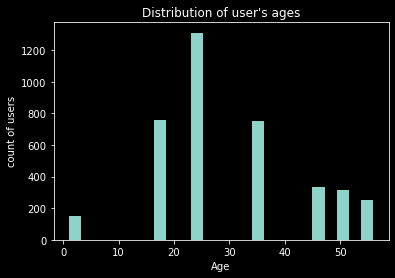

In [22]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of user's ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [23]:
df.dtypes

MovieIDs       int32
Movie_Name    object
Genre         object
ID             int32
MovieID        int32
Ratings        int32
TimeStamp      int32
UserID         int32
Gender        object
Age            int32
Occupation     int32
Zip-code      object
dtype: object

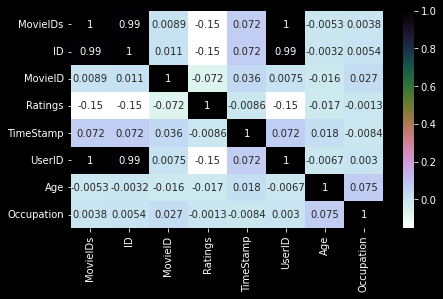

In [24]:
s=(df.dtypes==object)
S=s[s].index
corr_df=df.copy().drop(columns=S)
plt.figure(figsize=(7,4)) 
sns.heatmap(corr_df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

# Dropping least relevant columns

In [25]:
col1 = ["MovieIDs","UserID","Movie_Name","MovieID","TimeStamp","Zip-code"]
col2 = ['Genre','ID','Gender','Occupation']
df_cut = df.drop(columns=col2)
df = df.drop(columns=col1)

# Categorizing Age column

In [26]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
463,18,10-19
630,45,40-49
2368,50,50-59
1075,25,20-29
3805,35,30-39
2320,56,50-59
882,1,0-9


In [27]:
df['age_group'].head()

463     10-19
630     40-49
2368    50-59
2442    40-49
1075    20-29
Name: age_group, dtype: category
Categories (8, object): ['0-9' < '10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [28]:
df=df.drop(columns="Age")

# Managing the categorical features

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
df.dtypes

Genre           object
ID               int32
Ratings          int32
Gender          object
Occupation       int32
age_group     category
dtype: object

Taking out Genre and Gender in a list named 'object_cols'

In [31]:
object_cols=(df.dtypes==object)
object_cols

Genre          True
ID            False
Ratings       False
Gender         True
Occupation    False
age_group     False
dtype: bool

In [32]:
object_cols=list(object_cols[object_cols].index)
object_cols

['Genre', 'Gender']

In [33]:
object_cols.append("age_group")
object_cols

['Genre', 'Gender', 'age_group']

Appending age_group column separately since it was not included as in object columns

In [34]:
Onehot_encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)

Creating a dataframe called 'Onehot_cols' that contains only the one hot encoded columns

In [35]:
Onehot_cols = pd.DataFrame(Onehot_encoder.fit_transform(df[object_cols]))
Onehot_cols

C:\Users\Jai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,299,300,301,302,303,304,305,306,307,308
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [36]:
Onehot_cols.index = df.index

num_df will contain only the numerical feautures

In [37]:
num_df = df.drop(object_cols, axis=1)
num_df

,ID,Ratings,Occupation
463,6,5,19
630,8,4,17
2368,19,4,1
2442,19,4,4
1075,10,5,3
...,...,...,...
457,6,4,4
1780,17,4,0
429,5,4,10
1708,16,1,0


Combining both num_df and onehot_cols, to get an exclusive dataframe without any categorical feautures

In [38]:
Onehot_df = pd.concat([num_df, Onehot_cols], axis=1)
Onehot_df

,ID,Ratings,Occupation,0,1,2,3,4,5,6,...,299,300,301,302,303,304,305,306,307,308
463,6,5,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
630,8,4,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2368,19,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2442,19,4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1075,10,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,6,4,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1780,17,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
429,5,4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1708,16,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
Onehot_df.columns = Onehot_df.columns.astype(str)

Since the column names are also numerical, changing them to str data type as a general convention

# Feature and target splitting

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
y=pd.Series(df["Ratings"]) #Target
df=df.drop(columns="Ratings") #Features

In [42]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(Onehot_df,y,train_size=0.8,test_size=0.2)

# Model Building and Model Training

In [43]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression()

In [45]:
logreg.fit(Xtrain,Ytrain)

C:\Users\Jai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Output Prediction

In [46]:
Y_pred_train = logreg.predict(Xtrain)
Y_pred_test = logreg.predict(Xtest)

# Model Evaluation

In [47]:
train_acc = round(logreg.score(Xtrain, Ytrain) * 100, 2)
train_acc

92.69

In [48]:
test_acc = round(logreg.score(Xtest, Ytest) * 100, 2)
test_acc

92.66